<a href="https://colab.research.google.com/github/Boss-Darius/PMP-2023/blob/main/PMP_Partial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#Problema 1
import pymc as pm
import random
import numpy as np
from scipy import stats
from random import seed
from random import randint

#1.1)

stemeP0=0

for i in range(0,20000):
  seed(1)
  castigator=''
  alegere=randint(0,1)

  if alegere==0:
    DistributieP0=stats.binom(1,0.6)
    DistributieP1=stats.binom(2,0.5)

    n=DistributieP0.rvs()
    m=DistributieP1.rvs(size=2)

    if n>(m[0]+m[1]): stemeP0+=1

  else :
    DistributieP0=stats.binom(2,0.6)
    DistributieP1=stats.binom(1,0.5)

    n=DistributieP0.rvs(size=2)
    m=DistributieP1.rvs()

    if m<(n[0]+n[1]): stemeP0+=1

if(stemeP0>20000-stemeP0): print("P0 are mai multe sanse de castig")
else: print("P1 are mai multe sanse de castig")


P1 are mai multe sanse de castig


In [36]:
pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.1 MB/s eta 0:00:00


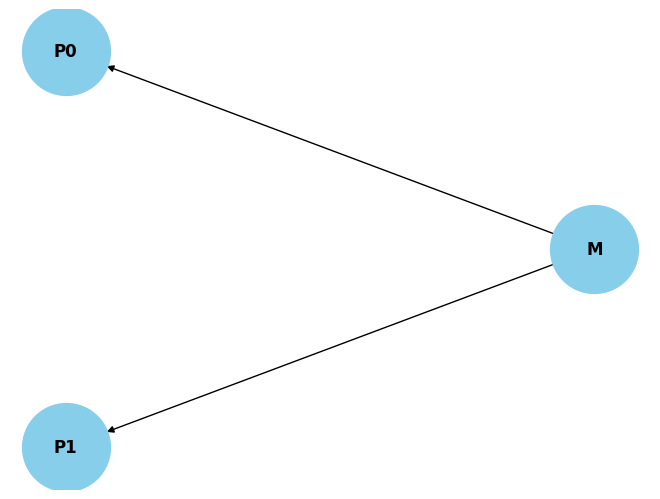

+-------+-------+--------------+
| P1    | P0    |   phi(P1,P0) |
+=======+=======+==============+
| P1(0) | P0(0) |       1.0833 |
+-------+-------+--------------+
| P1(0) | P0(1) |       1.4167 |
+-------+-------+--------------+
| P1(1) | P0(0) |       0.5833 |
+-------+-------+--------------+
| P1(1) | P0(1) |       0.9167 |
+-------+-------+--------------+


In [51]:
#1.2)

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx

model=BayesianNetwork([('M','P01'),('M','P11')])

CPD_AlegereJocator=TabularCPD(variable='M', variable_card=2,values=[[0.5],[0.5]])

CPD_JucatorP0=TabularCPD(variable='P01', variable_card=2,values=[[1/3,1/9],[2/3,8/9]],evidence=['M'],evidence_card=[2])

CPD_JucatorP1=TabularCPD(variable='P11', variable_card=2,values=[[3/4,1/2],[1/4,1/2]],evidence=['M'],evidence_card=[2])

model.add_cpds(CPD_AlegereJocator,CPD_JucatorP0,CPD_JucatorP1)

assert model.check_model()
pos = nx.circular_layout(model)
nx.draw(model, pos=pos, with_labels=True, node_size=4000, font_weight='bold', node_color='skyblue')
plt.show()

#1.3)

infer = VariableElimination(model)

result0= infer.query(variables=['P0'], evidence={'M': 0})
result1= infer.query(variables=['P1'], evidence={'M': 0})
result=result1+result0

print(result)
#ne putem da seama din grafic ca este mai probabil sa obtinem stema in prima runda (P0(0)+P1(0))

In [ ]:
#Problema 2)

In [60]:
#2.1)

import random
import numpy as np
from scipy import stats
miu=30
sigma=15
Timp=stats.norm(miu,sigma)

exemplu=Timp.rvs(size=200)

print(exemplu)


#2.2) Am ales pentru miu o distributie de tip Poisson deoarece ma intereseaza sa aflu cat de des trebuie sa astepte un client, iar o distributie exponentiala pentru sigma
# deoarece sigma are doar valori pozitive
import pymc as pm

with pm.Model() as estimare:
  miu=pm.Poisson('miu',30)
  sigma= pm.Exponential('sigma',1/15)

  timpMediu=pm.Normal('T',mu=miu,sigma=sigma,observed=miu)

  idata=pm.sample(1000, return_inferencedata=True)


#2.3)
import arviz as az
import matplotlib.pyplot as plt
trace=pm.sample_posterior_predictive(idata, model=estimare, extend_inferencedata=True)

ax= az.plot_ppc(trace, num_pp_samples=100, figsize=(12, 6), mean=False)
plt.show()

[ 39.1948474   37.62617113  28.32851906  38.62603395  53.27243807
  32.4829577   15.22531227  22.88303926  25.35537664  14.39668222
  31.74148521  20.74426674  19.81030755  40.32272492  10.54752831
  23.3284677   32.57504616  38.5645007  -10.08141823  25.52959623
  32.51494028  34.65783023  26.89819414  26.4647194   42.30441409
  21.90034766  29.78472895  12.98419434  28.28060785 -10.74111247
  47.80465385  26.10380489  43.18287735  62.12762832  36.33329634
  33.02960234  43.35233888  12.9964317   35.44048567  35.78244127
  17.21052084  50.02317078  41.39357599  37.11206952  33.48530943
  15.26276857  32.60361906  -7.06514566  41.42159446  16.81680259
  35.90765877   6.76626195  60.07670639  44.42870236  42.23474703
   5.24694573  52.02603024  21.75814613  60.35508677  65.49532355
  36.86445347  47.29841471  44.58574425  27.76858201  40.62758098
  17.99997215  30.31995304  25.85143901  52.43673921  52.96486576
  21.06568115   7.57414774  -2.43549089  31.39466535  57.577185
  28.7856356

/usr/local/lib/python3.10/dist-packages/pymc/backends/arviz.py:65: UserWarning: Could not extract data from symbolic observation T
  warnings.warn(f"Could not extract data from symbolic observation {obs}")


/usr/local/lib/python3.10/dist-packages/pymc/backends/arviz.py:65: UserWarning: Could not extract data from symbolic observation T
  warnings.warn(f"Could not extract data from symbolic observation {obs}")


TypeError: ignored